# TP de Aprendizagem de Máquina
### Aluno: Geanderson Esteves dos Santos

Trabalho Prático 1
- Redes Neuronais + Backpropagation

Neste trabalho você irá implementar uma rede neuronal com três camadas:

1. Camada de entrada: cada unidade representa uma dimensão do dado de entrada.

2. Camada oculta: cada unidade representa uma transformação a partir das unidades de entrada.

3. Camada de saída: cada unidade representa a chance da saída correspondente ser a correta.

Você irá utilizar a função Sigmóide para obter não-linearidade. Além disso, a função de perda a ser minimizada é a seguinte:

onde m é a quantidade de entradas no treino, K é o número de saídas possíveis,  representa a saída correta de cada classe k em cada entrada (i), e similarmente representa a saída dada pela rede neuronal.

O dado a ser utilizado está anexado. Trata-se de 5000 entradas, onde cada entrada refere-se a um dígito escrito manualmente (i.e., MNIST dataset). Dessa forma, m=5000 e K=10. Cada entrada é dada por uma matriz de dimensões 28 por 28, ou seja, um vetor de 784 dimensões. A primeira coluna do arquivo sempre é o rótulo do dígito correto.

A rede neuronal a ser implementada deverá ter 784 unidades de entrada e 10 unidades de saída. Em seus experimentos, você deverá variar o número de unidades na camada oculta (25, 50, 100).

Além disso, você deverá comparar os seguintes algoritmos de cálculo de gradiente:

1. Gradient Descent: o gradiente é calculado após cada época (após as 5000 entradas serem processadas).

2. Stochastic Gradient Descent: o gradiente é calculado após cada entrada.

3. Mini-Batch: o gradiente é calculado após um certo número de entradas (considere 10 e 50).

Por fim, você também deverá variar a taxa de aprendizado: 0.5, 1, 10.

O documento a ser entregue deverá apresentar o resultado de seus experimentos. Ou seja, deverá apresentar discussão da variação do número de unidades na camada oculta para cada um dos três algoritmos de cálculo de gradiente. Você deverá apresentar gráficos mostrando a convergência do erro empírico para cada situação (unidades na camada oculta, algoritmo de cálculo do gradiente, taxa de aprendizado). Você deverá deixar claras todas as hipóteses que julgar serem pertinentes.

In [1]:
# Required packages.
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras import optimizers

Using TensorFlow backend.


In [2]:
# Fix random seed for reproducibility.
seed = 7
np.random.seed(seed)

In [3]:
# Load data.
dataset = np.loadtxt("data_tp1", delimiter=",")
# 80% for training.
X_train = dataset[:4000, 1:].reshape(4000,1,28, 28).astype( 'float32' )
y_train = dataset[:4000,0]
# 20% for test.
X_test = dataset[4000:, 1:].reshape(1000,1,28, 28).astype( 'float32' )
y_test = dataset[4000:,0]

In [4]:
# An image is represented by 28*28 then it is a 784 in memory.
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [5]:
# Normalize inputs from 0-255 to 0-1.
X_train = X_train / 255
X_test = X_test / 255

In [6]:
# One hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [7]:
# Define model
def baseline_model(unity, learning_rate):
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(unity, input_dim=unity, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Set the gradient
    sgd = optimizers.SGD(lr=learning_rate)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

# Testes variando Gradient Descent (GD), Sthocastic Gradient Descent (SGD) e Mini-Batch
### Para efeito de comparação e seguindo as intruções do TP mostradas no primeiro item deste notebook.
##### 1 - Testar o learning rate (0.5, 1, 10) para os 3 gradientes (GD, SGD e Mini-Batch) variando o número de unidades da hidden layer (25, 50, 100). 
##### 2 - Realizar testes complementares variando parâmetros não previstos no enunciado do TP. 

In [8]:
# Set up the arrays with the inputs and outputs of the tests. 
inputsGD = []
inputsGD.append([])
inputsGD.append([])
inputsGD.append([])
inputsGD.append([])
outputsGD = []
outputsGD.append([])
outputsGD.append([])
outputsGD.append([])
outputsGD.append([])

In [9]:
inputsSGD = []
inputsSGD.append([])
inputsSGD.append([])
inputsSGD.append([])
inputsSGD.append([])
outputsSGD = []
outputsSGD.append([])
outputsSGD.append([])
outputsSGD.append([])
outputsSGD.append([])

In [10]:
inputsMiniBatch10 = []
inputsMiniBatch10.append([])
inputsMiniBatch10.append([])
inputsMiniBatch10.append([])
inputsMiniBatch10.append([])
outputsMiniBatch10 = []
outputsMiniBatch10.append([])
outputsMiniBatch10.append([])
outputsMiniBatch10.append([])
outputsMiniBatch10.append([])

In [11]:
inputsMiniBatch50 = []
inputsMiniBatch50.append([])
inputsMiniBatch50.append([])
inputsMiniBatch50.append([])
inputsMiniBatch50.append([])
outputsMiniBatch50 = []
outputsMiniBatch50.append([])
outputsMiniBatch50.append([])
outputsMiniBatch50.append([])
outputsMiniBatch50.append([])

In [12]:
# Use the model by parameters.
def use_model(lr, un, gradient, index, x_axis):
    
    for l, u in zip(lr, un):
        if x_axis == 'lr':
            x = l
        else:
            x = u
        
        if gradient == 'gd':
            inputsGD[index].append(x)
            model = baseline_model(u, l)
            model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=5000, verbose=1)
            scores = model.evaluate(X_test, y_test, verbose=0)
            print(100-scores[1]*100)
            outputsGD[index].append(100-scores[1]*100)
        elif gradient == 'sgd':
            inputsSGD[index].append(x)
            model = baseline_model(u, l)
            model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=1, verbose=1)
            scores = model.evaluate(X_test, y_test, verbose=0)
            print(100-scores[1]*100)
            outputsSGD[index].append(100-scores[1]*100)
        elif gradient == 'mb10':
            inputsMiniBatch10[index].append(x)
            model = baseline_model(u, l)
            model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10, verbose=1)
            scores = model.evaluate(X_test, y_test, verbose=0)
            print(100-scores[1]*100)
            outputsMiniBatch10[index].append(100-scores[1]*100)
        elif gradient == 'mb50':
            inputsMiniBatch50[index].append(x)
            model = baseline_model(u, l)
            model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=50, verbose=1)
            scores = model.evaluate(X_test, y_test, verbose=0)
            print(100-scores[1]*100)
            outputsMiniBatch50[index].append(100-scores[1]*100)

In [13]:
# GD.
use_model([0.5, 1, 10], [25, 25, 25], 'gd', 0, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 1s 162us/step - loss: 2.3083 - acc: 0.0950 - val_loss: 2.3009 - val_acc: 0.1040
Epoch 2/10
4000/4000 [==============================] - 0s 85us/step - loss: 2.3040 - acc: 0.0990 - val_loss: 2.2996 - val_acc: 0.0860
Epoch 3/10
4000/4000 [==============================] - 0s 69us/step - loss: 2.3018 - acc: 0.0840 - val_loss: 2.2989 - val_acc: 0.1210
Epoch 4/10
4000/4000 [==============================] - 0s 74us/step - loss: 2.3005 - acc: 0.1135 - val_loss: 2.2984 - val_acc: 0.1210
Epoch 5/10
4000/4000 [==============================] - 0s 88us/step - loss: 2.2997 - acc: 0.1125 - val_loss: 2.2980 - val_acc: 0.1210
Epoch 6/10
4000/4000 [==============================] - 0s 71us/step - loss: 2.2989 - acc: 0.1125 - val_loss: 2.2976 - val_acc: 0.1210
Epoch 7/10
4000/4000 [==============================] - 0s 71us/step - loss: 2.2983 - acc: 0.1125 - val_loss: 2.2972 - val_acc: 0.1210
Epoch 

In [14]:
# SGD.
use_model([0.5, 1, 10], [25, 25, 25], 'sgd', 0, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 36s 9ms/step - loss: 2.9218 - acc: 0.1000 - val_loss: 3.3517 - val_acc: 0.0840
Epoch 2/10
4000/4000 [==============================] - 35s 9ms/step - loss: 3.0886 - acc: 0.1520 - val_loss: 2.7323 - val_acc: 0.2800
Epoch 3/10
4000/4000 [==============================] - 40s 10ms/step - loss: 3.4394 - acc: 0.1903 - val_loss: 4.0993 - val_acc: 0.1980
Epoch 4/10
4000/4000 [==============================] - 45s 11ms/step - loss: 3.6416 - acc: 0.1717 - val_loss: 4.7612 - val_acc: 0.0920
Epoch 5/10
4000/4000 [==============================] - 36s 9ms/step - loss: 3.7197 - acc: 0.1285 - val_loss: 4.3592 - val_acc: 0.1650
Epoch 6/10
4000/4000 [==============================] - 36s 9ms/step - loss: 3.5028 - acc: 0.1935 - val_loss: 3.0961 - val_acc: 0.1670
Epoch 7/10
4000/4000 [==============================] - 36s 9ms/step - loss: 3.4877 - acc: 0.2000 - val_loss: 2.7469 - val_acc: 0.3430
Epoch

In [15]:
# MB10.
use_model([0.5, 1, 10], [25, 25, 25], 'mb10', 0, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 5s 1ms/step - loss: 1.7887 - acc: 0.3363 - val_loss: 0.9635 - val_acc: 0.6770
Epoch 2/10
4000/4000 [==============================] - 4s 1ms/step - loss: 0.7592 - acc: 0.7462 - val_loss: 0.5486 - val_acc: 0.8250
Epoch 3/10
4000/4000 [==============================] - 4s 972us/step - loss: 0.5088 - acc: 0.8422 - val_loss: 0.4749 - val_acc: 0.8520
Epoch 4/10
4000/4000 [==============================] - 6s 1ms/step - loss: 0.3986 - acc: 0.8740 - val_loss: 0.4867 - val_acc: 0.8370
Epoch 5/10
4000/4000 [==============================] - 5s 1ms/step - loss: 0.3288 - acc: 0.8992 - val_loss: 0.4423 - val_acc: 0.8660
Epoch 6/10
4000/4000 [==============================] - 4s 1ms/step - loss: 0.2691 - acc: 0.9132 - val_loss: 0.4017 - val_acc: 0.8750
Epoch 7/10
4000/4000 [==============================] - 4s 1ms/step - loss: 0.2269 - acc: 0.9295 - val_loss: 0.3706 - val_acc: 0.8970
Epoch 8/10
4

In [16]:
# MB50.
use_model([0.5, 1, 10], [25, 25, 25], 'mb50', 0, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 2s 514us/step - loss: 2.2668 - acc: 0.1572 - val_loss: 2.1137 - val_acc: 0.3540
Epoch 2/10
4000/4000 [==============================] - 1s 287us/step - loss: 1.8000 - acc: 0.3747 - val_loss: 1.4448 - val_acc: 0.4760
Epoch 3/10
4000/4000 [==============================] - 1s 356us/step - loss: 1.1892 - acc: 0.5815 - val_loss: 1.0185 - val_acc: 0.6490
Epoch 4/10
4000/4000 [==============================] - 1s 258us/step - loss: 0.8608 - acc: 0.7145 - val_loss: 0.7002 - val_acc: 0.7860
Epoch 5/10
4000/4000 [==============================] - 1s 249us/step - loss: 0.6806 - acc: 0.7762 - val_loss: 0.6110 - val_acc: 0.8060
Epoch 6/10
4000/4000 [==============================] - 1s 271us/step - loss: 0.5554 - acc: 0.8262 - val_loss: 0.5281 - val_acc: 0.8350
Epoch 7/10
4000/4000 [==============================] - 1s 299us/step - loss: 0.4621 - acc: 0.8570 - val_loss: 0.5370 - val_acc: 0.8250


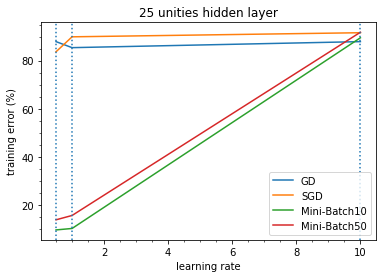

<Figure size 432x288 with 0 Axes>

In [17]:
index = 0

plt.plot(inputsGD[index], outputsGD[index], label='GD')
plt.plot(inputsSGD[index], outputsSGD[index], label='SGD')
plt.plot(inputsMiniBatch10[index], outputsMiniBatch10[index], label='Mini-Batch10')
plt.plot(inputsMiniBatch50[index], outputsMiniBatch50[index], label='Mini-Batch50')
plt.xlabel('learning rate')
plt.axvline(x=0.5, ls='dotted')
plt.axvline(x=1, ls='dotted')
plt.axvline(x=10, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("25 unities hidden layer")
plt.legend()
plt.show()
plt.savefig('25-unities-hidden-layer.png')

In [18]:
# GD.
use_model([0.5, 1, 10], [50, 50, 50], 'gd', 1, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 1s 199us/step - loss: 2.3087 - acc: 0.1045 - val_loss: 2.2986 - val_acc: 0.1210
Epoch 2/10
4000/4000 [==============================] - 0s 65us/step - loss: 2.2988 - acc: 0.1125 - val_loss: 2.2970 - val_acc: 0.1210
Epoch 3/10
4000/4000 [==============================] - 0s 82us/step - loss: 2.2976 - acc: 0.1125 - val_loss: 2.2959 - val_acc: 0.1210
Epoch 4/10
4000/4000 [==============================] - 0s 70us/step - loss: 2.2965 - acc: 0.1125 - val_loss: 2.2947 - val_acc: 0.1210
Epoch 5/10
4000/4000 [==============================] - 0s 71us/step - loss: 2.2954 - acc: 0.1125 - val_loss: 2.2936 - val_acc: 0.1210
Epoch 6/10
4000/4000 [==============================] - 0s 69us/step - loss: 2.2943 - acc: 0.1125 - val_loss: 2.2924 - val_acc: 0.1210
Epoch 7/10
4000/4000 [==============================] - 0s 64us/step - loss: 2.2931 - acc: 0.1125 - val_loss: 2.2913 - val_acc: 0.1210
Epoch 

In [19]:
# SGD.
use_model([0.5, 1, 10], [50, 50, 50], 'sgd', 1, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 32s 8ms/step - loss: 3.1975 - acc: 0.1410 - val_loss: 4.3688 - val_acc: 0.2080
Epoch 2/10
4000/4000 [==============================] - 29s 7ms/step - loss: 5.4861 - acc: 0.1792 - val_loss: 8.4298 - val_acc: 0.1480
Epoch 3/10
4000/4000 [==============================] - 34s 9ms/step - loss: 9.5481 - acc: 0.1395 - val_loss: 11.7091 - val_acc: 0.0840
Epoch 4/10
4000/4000 [==============================] - 36s 9ms/step - loss: 11.1349 - acc: 0.1028 - val_loss: 11.0492 - val_acc: 0.1210
Epoch 5/10
4000/4000 [==============================] - 36s 9ms/step - loss: 11.1689 - acc: 0.0995 - val_loss: 11.3217 - val_acc: 0.0840
Epoch 6/10
4000/4000 [==============================] - 31s 8ms/step - loss: 11.2003 - acc: 0.0965 - val_loss: 11.0052 - val_acc: 0.1210
Epoch 7/10
4000/4000 [==============================] - 33s 8ms/step - loss: 11.1846 - acc: 0.0980 - val_loss: 11.3425 - val_acc: 0.084

In [20]:
# MB10.
use_model([0.5, 1, 10], [50, 50, 50], 'mb10', 1, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 5s 1ms/step - loss: 1.7858 - acc: 0.3353 - val_loss: 0.9249 - val_acc: 0.6660
Epoch 2/10
4000/4000 [==============================] - 4s 950us/step - loss: 0.7119 - acc: 0.7547 - val_loss: 0.5870 - val_acc: 0.7950
Epoch 3/10
4000/4000 [==============================] - 4s 1ms/step - loss: 0.4833 - acc: 0.8490 - val_loss: 0.4581 - val_acc: 0.8670
Epoch 4/10
4000/4000 [==============================] - 4s 988us/step - loss: 0.3846 - acc: 0.8770 - val_loss: 0.3844 - val_acc: 0.8740
Epoch 5/10
4000/4000 [==============================] - 4s 966us/step - loss: 0.3065 - acc: 0.9022 - val_loss: 0.3904 - val_acc: 0.8750
Epoch 6/10
4000/4000 [==============================] - 4s 992us/step - loss: 0.2598 - acc: 0.9152 - val_loss: 0.4621 - val_acc: 0.8610
Epoch 7/10
4000/4000 [==============================] - 4s 1ms/step - loss: 0.2135 - acc: 0.9292 - val_loss: 0.4207 - val_acc: 0.8740
Epoch 

In [21]:
# MB50.
use_model([0.5, 1, 10], [50, 50, 50], 'mb50', 1, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 3s 708us/step - loss: 2.2571 - acc: 0.1625 - val_loss: 2.0586 - val_acc: 0.2020
Epoch 2/10
4000/4000 [==============================] - 1s 246us/step - loss: 1.6679 - acc: 0.4158 - val_loss: 1.4649 - val_acc: 0.4460
Epoch 3/10
4000/4000 [==============================] - 1s 241us/step - loss: 0.9964 - acc: 0.6560 - val_loss: 0.8421 - val_acc: 0.7520
Epoch 4/10
4000/4000 [==============================] - 1s 206us/step - loss: 0.6892 - acc: 0.7797 - val_loss: 0.5934 - val_acc: 0.8140
Epoch 5/10
4000/4000 [==============================] - 1s 209us/step - loss: 0.5540 - acc: 0.8250 - val_loss: 0.5099 - val_acc: 0.8420
Epoch 6/10
4000/4000 [==============================] - 1s 211us/step - loss: 0.4658 - acc: 0.8507 - val_loss: 0.4565 - val_acc: 0.8540
Epoch 7/10
4000/4000 [==============================] - 1s 205us/step - loss: 0.4157 - acc: 0.8755 - val_loss: 0.4816 - val_acc: 0.8600


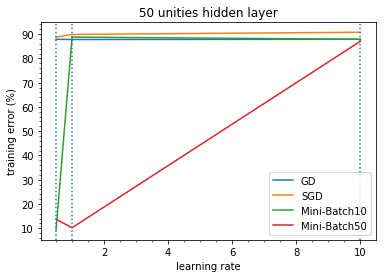

<Figure size 432x288 with 0 Axes>

In [22]:
index = 1

plt.plot(inputsGD[index], outputsGD[index], label='GD')
plt.plot(inputsSGD[index], outputsSGD[index], label='SGD')
plt.plot(inputsMiniBatch10[index], outputsMiniBatch10[index], label='Mini-Batch10')
plt.plot(inputsMiniBatch50[index], outputsMiniBatch50[index], label='Mini-Batch50')
plt.xlabel('learning rate')
plt.axvline(x=0.5, ls='dotted')
plt.axvline(x=1, ls='dotted')
plt.axvline(x=10, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("50 unities hidden layer")
plt.legend()
plt.show()
plt.savefig('50-unities-hidden-layer.png')

In [23]:
# GD.
use_model([0.5, 1, 10], [100, 100, 100], 'gd', 2, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 1s 275us/step - loss: 2.3450 - acc: 0.0930 - val_loss: 2.3044 - val_acc: 0.1210
Epoch 2/10
4000/4000 [==============================] - 0s 64us/step - loss: 2.3098 - acc: 0.1125 - val_loss: 2.2989 - val_acc: 0.1660
Epoch 3/10
4000/4000 [==============================] - 0s 60us/step - loss: 2.2984 - acc: 0.1692 - val_loss: 2.2941 - val_acc: 0.1210
Epoch 4/10
4000/4000 [==============================] - 0s 62us/step - loss: 2.2957 - acc: 0.1125 - val_loss: 2.2928 - val_acc: 0.1210
Epoch 5/10
4000/4000 [==============================] - 0s 61us/step - loss: 2.2935 - acc: 0.1125 - val_loss: 2.2902 - val_acc: 0.1210
Epoch 6/10
4000/4000 [==============================] - 1s 128us/step - loss: 2.2914 - acc: 0.1125 - val_loss: 2.2883 - val_acc: 0.1210
Epoch 7/10
4000/4000 [==============================] - 0s 117us/step - loss: 2.2892 - acc: 0.1125 - val_loss: 2.2860 - val_acc: 0.1210
Epoc

In [24]:
# SGD.
use_model([0.5, 1, 10], [100, 100, 100], 'sgd', 2, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 41s 10ms/step - loss: 14.4344 - acc: 0.1042 - val_loss: 14.7964 - val_acc: 0.0820
Epoch 2/10
4000/4000 [==============================] - 31s 8ms/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.7964 - val_acc: 0.0820
Epoch 3/10
4000/4000 [==============================] - 30s 8ms/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.7964 - val_acc: 0.0820
Epoch 4/10
4000/4000 [==============================] - 31s 8ms/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.7964 - val_acc: 0.0820
Epoch 5/10
4000/4000 [==============================] - 30s 8ms/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.7964 - val_acc: 0.0820
Epoch 6/10
4000/4000 [==============================] - 30s 8ms/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.7964 - val_acc: 0.0820
Epoch 7/10
4000/4000 [==============================] - 31s 8ms/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.7964 - val_acc:

In [25]:
# MB10.
use_model([0.5, 1, 10], [100, 100, 100], 'mb10', 2, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 5s 1ms/step - loss: 1.9513 - acc: 0.2595 - val_loss: 1.1526 - val_acc: 0.6080
Epoch 2/10
4000/4000 [==============================] - 4s 933us/step - loss: 0.8933 - acc: 0.6915 - val_loss: 0.6565 - val_acc: 0.7980
Epoch 3/10
4000/4000 [==============================] - 4s 938us/step - loss: 0.5627 - acc: 0.8142 - val_loss: 0.6131 - val_acc: 0.8040
Epoch 4/10
4000/4000 [==============================] - 5s 1ms/step - loss: 0.4716 - acc: 0.8497 - val_loss: 0.5314 - val_acc: 0.8200
Epoch 5/10
4000/4000 [==============================] - 5s 1ms/step - loss: 0.3858 - acc: 0.8845 - val_loss: 0.3961 - val_acc: 0.8770
Epoch 6/10
4000/4000 [==============================] - 4s 1ms/step - loss: 0.3519 - acc: 0.8875 - val_loss: 0.4690 - val_acc: 0.8720
Epoch 7/10
4000/4000 [==============================] - 4s 969us/step - loss: 0.3287 - acc: 0.8982 - val_loss: 0.4314 - val_acc: 0.8670
Epoch 8/

In [26]:
# MB50.
use_model([0.5, 1, 10], [100, 100, 100], 'mb50', 2, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 3s 745us/step - loss: 2.2310 - acc: 0.1650 - val_loss: 2.0344 - val_acc: 0.1540
Epoch 2/10
4000/4000 [==============================] - 1s 315us/step - loss: 1.5499 - acc: 0.4580 - val_loss: 1.2899 - val_acc: 0.4890
Epoch 3/10
4000/4000 [==============================] - 1s 295us/step - loss: 0.8723 - acc: 0.7030 - val_loss: 0.7845 - val_acc: 0.7050
Epoch 4/10
4000/4000 [==============================] - 1s 311us/step - loss: 0.6480 - acc: 0.7830 - val_loss: 0.6020 - val_acc: 0.7970
Epoch 5/10
4000/4000 [==============================] - 1s 263us/step - loss: 0.5275 - acc: 0.8247 - val_loss: 0.5334 - val_acc: 0.8340
Epoch 6/10
4000/4000 [==============================] - 1s 258us/step - loss: 0.4513 - acc: 0.8540 - val_loss: 0.4815 - val_acc: 0.8430
Epoch 7/10
4000/4000 [==============================] - 1s 297us/step - loss: 0.4141 - acc: 0.8645 - val_loss: 0.5000 - val_acc: 0.8470


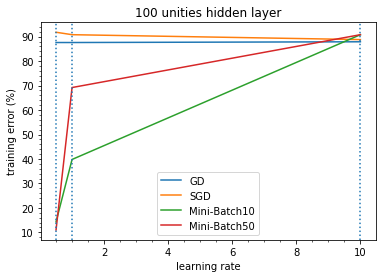

<Figure size 432x288 with 0 Axes>

In [27]:
index = 2

plt.plot(inputsGD[index], outputsGD[index], label='GD')
plt.plot(inputsSGD[index], outputsSGD[index], label='SGD')
plt.plot(inputsMiniBatch10[index], outputsMiniBatch10[index], label='Mini-Batch10')
plt.plot(inputsMiniBatch50[index], outputsMiniBatch50[index], label='Mini-Batch50')
plt.xlabel('learning rate')
plt.axvline(x=0.5, ls='dotted')
plt.axvline(x=1, ls='dotted')
plt.axvline(x=10, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("100 unities hidden layer")
plt.legend()
plt.show()
plt.savefig('100-unities-hidden-layer.png')

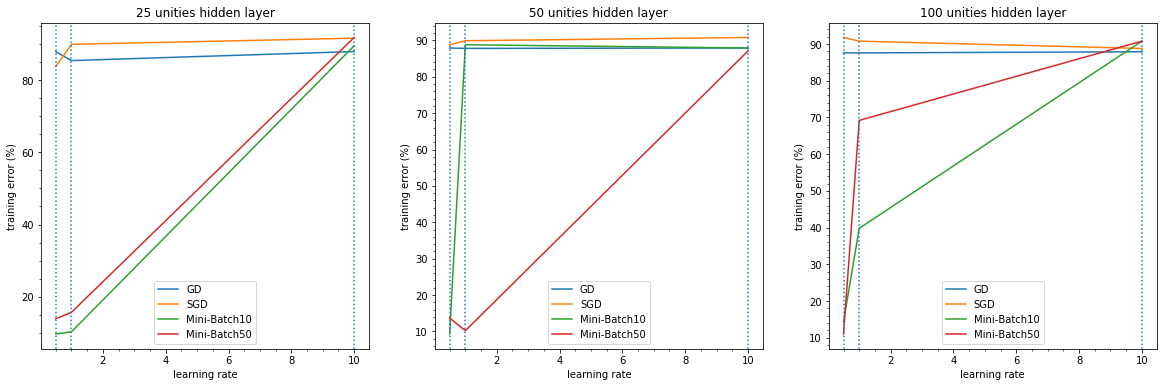

In [28]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))
ax1.plot(inputsGD[0], outputsGD[0], label='GD')
ax1.plot(inputsSGD[0], outputsSGD[0], label='SGD')
ax1.plot(inputsMiniBatch10[0], outputsMiniBatch10[0], label='Mini-Batch10')
ax1.plot(inputsMiniBatch50[0], outputsMiniBatch50[0], label='Mini-Batch50')
ax1.axvline(x=0.5, ls='dotted')
ax1.axvline(x=1, ls='dotted')
ax1.axvline(x=10, ls='dotted')
ax1.minorticks_on()
ax1.legend()
ax1.set_xlabel('learning rate')
ax1.set_ylabel('training error (%)')
ax1.set_title('25 unities hidden layer')

ax2.plot(inputsGD[1], outputsGD[1], label='GD')
ax2.plot(inputsSGD[1], outputsSGD[1], label='SGD')
ax2.plot(inputsMiniBatch10[1], outputsMiniBatch10[1], label='Mini-Batch10')
ax2.plot(inputsMiniBatch50[1], outputsMiniBatch50[1], label='Mini-Batch50')
ax2.axvline(x=0.5, ls='dotted')
ax2.axvline(x=1, ls='dotted')
ax2.axvline(x=10, ls='dotted')
ax2.minorticks_on()
ax2.legend()
ax2.set_xlabel('learning rate')
ax2.set_ylabel('training error (%)')
ax2.set_title('50 unities hidden layer')

ax3.plot(inputsGD[2], outputsGD[2], label='GD')
ax3.plot(inputsSGD[2], outputsSGD[2], label='SGD')
ax3.plot(inputsMiniBatch10[2], outputsMiniBatch10[2], label='Mini-Batch10')
ax3.plot(inputsMiniBatch50[2], outputsMiniBatch50[2], label='Mini-Batch50')
ax3.axvline(x=0.5, ls='dotted')
ax3.axvline(x=1, ls='dotted')
ax3.axvline(x=10, ls='dotted')
ax3.minorticks_on()
ax3.legend()
ax3.set_xlabel('learning rate')
ax3.set_ylabel('training error (%)')
ax3.set_title('100 unities hidden layer')
f.savefig('comparison-hidden-layer.png')

# Discussão dos Resultados

Primeiramente, podemos notar nos gráficos apresentados acima que dois dos gradientes testados nunca obtiveram resultados interessantes para o problema de classificação de imagens (aka MNIS), i.e., GD e SGD obtiveram resultados muito ruins para o training error. As condições definidas no enunciado do TP podem ter influenciado diretamente os resultados desses dois gradientes em termos do uso da sigmoid para não linearidade e também do learning rate ter sido uma medida um pouco elevada (i.e., 0.5 foi o meno4 valor testado e 10 o maior valor testado). 
//Checar essa afirmação após os testes
A junção dos resultados é mostrada nos três gráficos gerados logo acima. Assim, o mini-batch foi o gradiente mais eficiente entre os testados, com destaque para o mini-batch de 10 batches que obteve resultados ligeiramente melhores do que o mini-batch de 50. 

O training error foi baixo se considerarmos que o conjunto de teste foi o próprio conjunto de treino, prática essa que deve ser evitada em casos reais de aplicação de algoritmos de machine learning no mundo real. Assim, embora o training error ter sido baixo em dois dos gradientes testados (i.e., mini-batch de 10 e 50), isso não significa que o nosso modelo seja bom, pois o test error pode ser alto. É importante notar que o learning rate de 10 sempre convergiu para os 4 tipos de gradientes testados, no sentido de que todos eles obtiveram resultados muitos ruins com este learning rate. Como vimos em sala de aula, muitos dos modelos de machine learning amplamente usados na academia usam um learning rate de 0.1. No entanto, a aplicação de um learning rate de 10 assim como no último dos testes realizados mostrou que este valor era altíssimo para o problema de classificação de imagens. Sendo que este learning rate obteve um training error de cerca de 90% para todos os 3 gradientes testados independente das outras métricas do modelo.

Desta forma, eu aprendi que em uma análise real do MNIST o mais adequado seria ter um conjunto de treino (assim como foi testado o modelo), um conjunto de teste, e mesmo a separação em um conjunto de validação com uma cross-validation seria o cenário perfeito de teste se estivéssemos tratando de um caso real de aplicação de machine learning. Em relação ao aumento das unidades da camada oculta para os três algoritmos, vamos realizar um teste exclusivo deste parâmetro para sabermos o seu real comportamento no conjunto de treino, para tal, o learning rate vai ser fixado em 0.5, que como visto nos três gráficos acima é o melhor learning rate obtido para quase todos gradientes. Somente o GD obteve resultados minimamente melhores com um learning rate de 1 em vez de 0.5. 

Como visto no gráfico abaixo, o aumento no número de unidades da camada oculta é relevante para o mini-batch de 10, onde os melhores resultados são encontrados com 100 unidades na camada oculta. Todavia, este aumento não se mostrou relevante para os outros gradientes, detalhe para o mini-batch de 50 que obteve piores resultados com 100 unidades na camada oculta do que com somente 50 (que foram os melhores resultados obtidos por esse gradiente). 

In [29]:
# GD.
use_model([0.5, 0.5, 0.5], [25, 50, 100], 'gd', 3, 'un')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 2s 440us/step - loss: 2.3060 - acc: 0.1185 - val_loss: 2.2987 - val_acc: 0.0950
Epoch 2/10
4000/4000 [==============================] - 0s 82us/step - loss: 2.3021 - acc: 0.0925 - val_loss: 2.2983 - val_acc: 0.1210
Epoch 3/10
4000/4000 [==============================] - 0s 75us/step - loss: 2.3004 - acc: 0.1130 - val_loss: 2.2982 - val_acc: 0.1210
Epoch 4/10
4000/4000 [==============================] - 0s 68us/step - loss: 2.2995 - acc: 0.1125 - val_loss: 2.2979 - val_acc: 0.1210
Epoch 5/10
4000/4000 [==============================] - 0s 68us/step - loss: 2.2988 - acc: 0.1125 - val_loss: 2.2975 - val_acc: 0.1210
Epoch 6/10
4000/4000 [==============================] - 0s 67us/step - loss: 2.2982 - acc: 0.1125 - val_loss: 2.2971 - val_acc: 0.1210
Epoch 7/10
4000/4000 [==============================] - 0s 66us/step - loss: 2.2976 - acc: 0.1125 - val_loss: 2.2966 - val_acc: 0.1210
Epoch 

In [30]:
# SGD.
use_model([0.5, 0.5, 0.5], [25, 50, 100], 'sgd', 3, 'un')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
 312/4000 [=>............................] - ETA: 48s - loss: 5.1384 - acc: 0.09

KeyboardInterrupt: 

In [ ]:
# MB10.
use_model([0.5, 0.5, 0.5], [25, 50, 100], 'mb10', 3, 'un')

In [ ]:
# MB50.
use_model([0.5, 0.5, 0.5], [25, 50, 100], 'mb50', 3, 'un')

In [ ]:
index = 3

plt.plot(inputsGD[index], outputsGD[index], label='GD')
plt.plot(inputsSGD[index], outputsSGD[index], label='SGD')
plt.plot(inputsMiniBatch10[index], outputsMiniBatch10[index], label='Mini-Batch10')
plt.plot(inputsMiniBatch50[index], outputsMiniBatch50[index], label='Mini-Batch50')
plt.xlabel('unities hidden layer')
plt.axvline(x=25, ls='dotted')
plt.axvline(x=50, ls='dotted')
plt.axvline(x=100, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("Gradients (GS, SGD, Mini-Batch 10 and 50)")
plt.legend()
plt.show()
plt.savefig('comparison-gradients.png')

# Testes Complementares

#### Apesar de não estar previsto no enunciado do TP, vamos variar alguns dos parâmetros:

## <span style="color:blue"> Setar para somente uma única época comparando com learning rate </span>

In [ ]:
lr = [0.5, 1, 10]
un = [100, 100, 100]
outputs = []

for i, u in zip(lr, un):
    model = baseline_model(u, i)
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=10, verbose=1)
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(100-scores[1]*100)
    outputs.append(100-scores[1]*100)
    
plt.plot(lr, outputs, label='Mini-Batch50')
plt.xlabel('learning rate')
plt.axvline(x=0.5, ls='dotted')
plt.axvline(x=1, ls='dotted')
plt.axvline(x=10, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("Mini-Batch 10 (1 epoch only)")
plt.legend()
plt.show()

### Discussão sobre setar somente uma época para execução do modelo (variando o learning rate): Com apenas uma época os resultados são piores do que com 10 épocas que foi a metodologia adotada durante todos os experimentos do trabalho. 

## <span style="color:blue">Setar para somente uma única época comparando com as unidades da camada oculta</span>

In [ ]:
lr = [1, 1, 1]
un = [25, 50, 100]
outputs = []

for i, u in zip(lr, un):
    model = baseline_model(u, i)
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=10, verbose=1)
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(100-scores[1]*100)
    outputs.append(100-scores[1]*100)
    
plt.plot(un, outputs, label='Mini-Batch50')
plt.xlabel('unities hidden layer')
plt.axvline(x=25, ls='dotted')
plt.axvline(x=50, ls='dotted')
plt.axvline(x=100, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("Mini-Batch 10 (1 epoch only)")
plt.legend()
plt.show()

### Discussão sobre setar somente uma época para execução do modelo (variando as unidades da camada oculta): Com apenas uma época os resultados são piores do que com 10 épocas que foi a metodologia adotada durante todos os experimentos do trabalho. 

## Setar o learning rate para 0.2

In [ ]:
lr = [0.2, 0.2, 0.2]
un = [25, 50, 100]
outputs = []

for i, u in zip(lr, un):
    model = baseline_model(u, i)
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10, verbose=1)
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(100-scores[1]*100)
    outputs.append(100-scores[1]*100)
    
plt.plot(un, outputs, label='Mini-Batch50')
plt.xlabel('unities hidden layer')
plt.axvline(x=25, ls='dotted')
plt.axvline(x=50, ls='dotted')
plt.axvline(x=100, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("Mini-Batch 10 (low learning rate)")
plt.legend()
plt.show()

### Discussão sobre diminuir o learning rate: Com apenas uma época os resultados são piores do que com 10 épocas que foi a metodologia adotada durante todos os experimentos do trabalho. 